In [18]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

### Generate Overfitting Example Plots

In [35]:
def make_plot(X, y, degree=1):
    poly = PolynomialFeatures(degree=degree)
    X_train = poly.fit_transform(X)
    print(degree, X_train.shape)
    print(poly.get_feature_names())
    clf = LogisticRegression(penalty='none', random_state=19, max_iter=500).fit(X_train, y)

    xx, yy = np.mgrid[-5:5:.1, -5:5:.1]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = clf.predict_proba(poly.transform(np.c_[xx.ravel(), yy.ravel()]))[:, 1].reshape(xx.shape)

    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                           vmin=0, vmax=1)

    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])

    ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
               cmap="RdBu", vmin=-.2, vmax=1.2,
               edgecolor="white", linewidth=1)

    ax.set(aspect="equal",
           xlim=(-5, 5), ylim=(-5, 5),
           xlabel="$X_1$", ylabel="$X_2$")
    plt.title(f'Model with Polynomial Degree {degree}')
    plt.savefig(f'../images/regularization_plots/plot{degree}.png');

In [36]:
X, y = make_classification(200, 2, 2, 0, weights=[.5, .5], random_state=15)

1 (200, 3)
['1', 'x0', 'x1']
2 (200, 6)
['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']
3 (200, 10)
['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3']
4 (200, 15)
['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4']


/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


5 (200, 21)
['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4', 'x0^5', 'x0^4 x1', 'x0^3 x1^2', 'x0^2 x1^3', 'x0 x1^4', 'x1^5']


/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


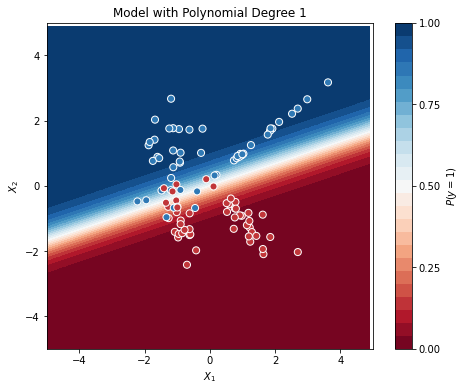

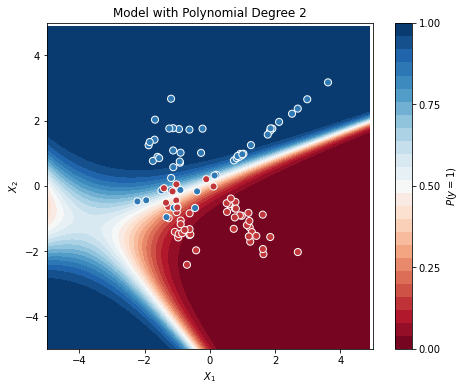

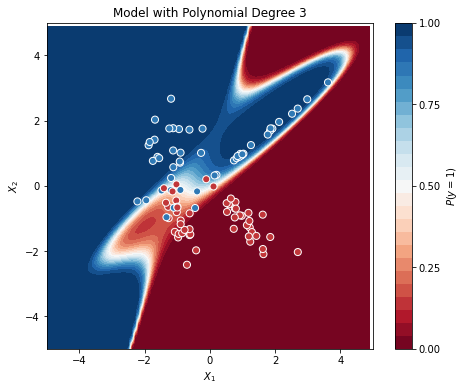

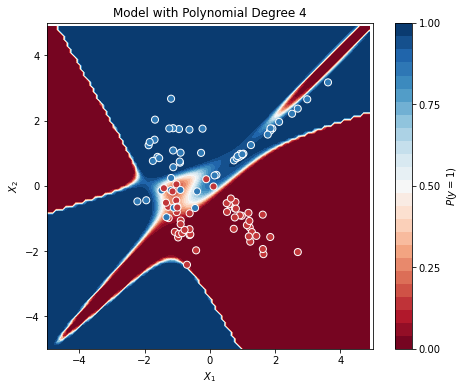

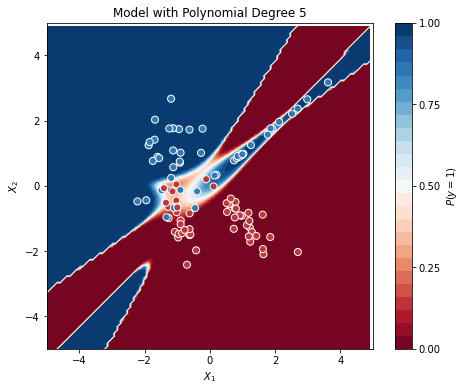

In [37]:
for degree in range(1, 6):
    make_plot(X, y, degree=int(degree))

In [42]:
def make_reg_plot(X, y, penalty_value=5):
    poly = PolynomialFeatures(degree=5)
    X_train = poly.fit_transform(X)

    clf = LogisticRegression(penalty='l2', C=penalty_value, random_state=19).fit(X_train, y)

    xx, yy = np.mgrid[-5:5:.1, -5:5:.1]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = clf.predict_proba(poly.transform(np.c_[xx.ravel(), yy.ravel()]))[:, 1].reshape(xx.shape)

    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                           vmin=0, vmax=1)

    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])

    ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
               cmap="RdBu", vmin=-.2, vmax=1.2,
               edgecolor="white", linewidth=1)

    ax.set(aspect="equal",
           xlim=(-5, 5), ylim=(-5, 5),
           xlabel="$X_1$", ylabel="$X_2$")
    plt.title(f'{degree} Poly. Degree Model with {penalty_value} lambda value')
    plt.savefig(f'../images/regularization_plots/reg_plot{penalty_value}.png');

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

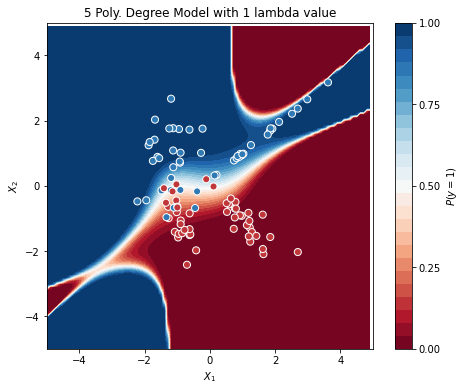

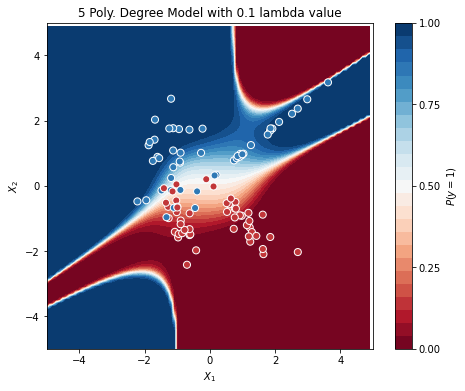

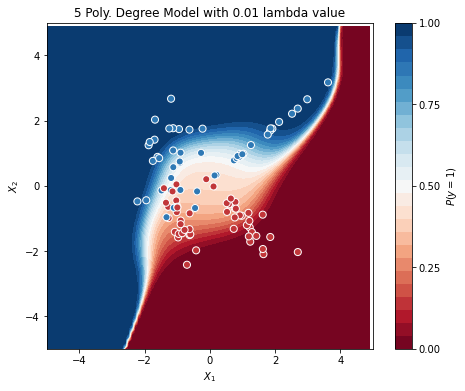

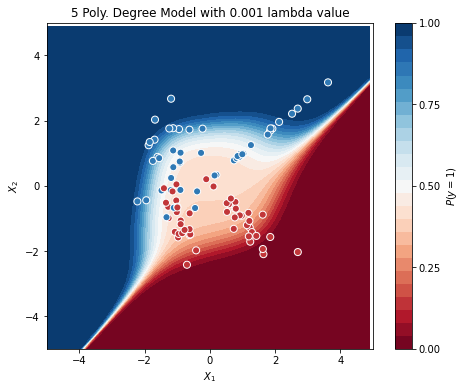

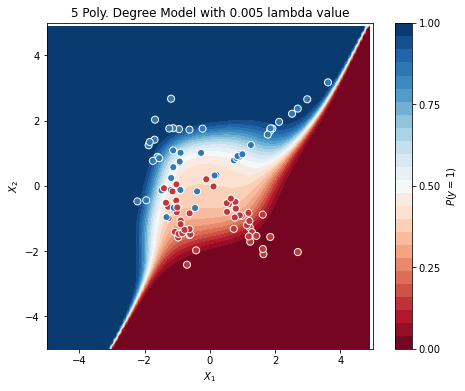

In [43]:
for c in [1, 0.1, .01, .001, .005]:
    make_reg_plot(X, y, penalty_value=c)